# Spam Detector

In [153]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, balanced_accuracy_score, roc_auc_score,precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np


## Retrieve the Data

The data is located at [https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv](https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv)

Dataset Source: [UCI Machine Learning Library](https://archive.ics.uci.edu/dataset/94/spambase)

Import the data using Pandas. Display the resulting DataFrame to confirm the import was successful.

In [154]:
# Import the data
data = pd.read_csv("https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv")

data.info() #check to see if there are nulls and all fields are numeric.  If not numeric will need encoding
print("-"*300)
display(data.describe()) #get basic stats to see if data will need scaling
print("-"*300)
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


## Predict Model Performance

You will be creating and comparing two models on this data: a Logistic Regression, and a Random Forests Classifier. Before you create, fit, and score the models, make a prediction as to which model you think will perform better. You do not need to be correct! 

Write down your prediction in the designated cells in your Jupyter Notebook, and provide justification for your educated guess.

The Random Forest Model will probably perform better due to it's ability to better handle large numbers of features, non-linear relationships, and feature interactions.

## Split the Data into Training and Testing Sets

In [155]:
# Create the labels set `y` and features DataFrame `X`
y=data["spam"]
X=data.drop(columns="spam")


In [159]:
# Check the balance of the labels variable (`y`) by using the `value_counts` function.

#the model is expecting an 1D array, and doing the value_counts requires a series.  So going the value_counts on the spam column in data instead of y.
data["spam"].value_counts()


spam
0    2788
1    1813
Name: count, dtype: int64

In [160]:
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test=train_test_split(X,y, random_state=42)

X_train.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
1173,0.00,0.0,0.00,0.0,0.00,0.00,1.23,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,1.939,0.000,0.000,1.379,8,40
1954,0.67,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.055,0.0,0.000,0.000,0.000,1.644,13,74
256,0.00,0.0,1.42,0.0,0.71,0.00,0.00,0.71,0.00,0.71,...,0.0,0.000,0.000,0.0,0.931,0.000,0.000,12.055,117,217
3341,0.00,0.0,0.24,0.0,0.09,0.04,0.00,0.00,0.04,0.00,...,0.0,0.014,0.148,0.0,0.014,0.044,0.007,2.112,26,1223
4469,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.000,0.000,0.000,1.500,2,3


## Scale the Features

Use the `StandardScaler` to scale the features data. Remember that only `X_train` and `X_test` DataFrames should be scaled.

In [161]:
from sklearn.preprocessing import StandardScaler

# Create the StandardScaler instance
scaler=StandardScaler()

In [162]:
# Fit the Standard Scaler with the training data
scaler=StandardScaler()
#see next box



In [163]:
# Scale the training data
X_train_scale=scaler.fit_transform(X_train)
X_test_scale=scaler.transform(X_test)

X_train_scale

array([[-0.33933373, -0.16214839, -0.55144324, ..., -0.11649103,
        -0.21175305, -0.41909144],
       [ 1.8777157 , -0.16214839, -0.55144324, ..., -0.10814021,
        -0.18841316, -0.35960578],
       [-0.33933373, -0.16214839,  2.2325961 , ...,  0.21993678,
         0.29705664, -0.10941609],
       ...,
       [-0.33933373, -0.16214839, -0.55144324, ..., -0.08642808,
        -0.20241709, -0.40334524],
       [-0.33933373,  0.02143809, -0.55144324, ..., -0.10902256,
        -0.18841316, -0.18639753],
       [-0.00843083, -0.16214839,  0.25239911, ..., -0.09960031,
        -0.1137255 ,  0.10403246]])

## Create and Fit a Logistic Regression Model

Create a Logistic Regression model, fit it to the training data, make predictions with the testing data, and print the model's accuracy score. Use a `random_state` of `1`. 

In [164]:
# Create and fit a Logistic Regression model
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(random_state=1)
lr_model.fit(X_train_scale, y_train)
lr_model

LogisticRegression(random_state=1)

In [165]:
# Make and save testing predictions with the trained Logistic Regression model using the test data

# Review the predictions
lr_predictions=lr_model.predict(X_test_scale)
lr_predictions

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [179]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.

print("Standard Accuracy")
print(f"Standard Training Data Score: {lr_model.score(X_train_scale, y_train)}")
print(f"Standard Testing Data Score: {lr_model.score(X_test_scale, y_test)}")
print(f"Standard Testing Date Score with accuracy_scale: {accuracy_score(y_test,lr_predictions)}")
print("-"*300)
print("Balanced Accuracy")
print(f"Balanced Training Data Score: {balanced_accuracy_score(y_test,lr_predictions)}")


Standard Accuracy
Standard Training Data Score: 0.9257971014492754
Standard Testing Data Score: 0.9226759339704604
Standard Testing Date Score with accuracy_scale: 0.9226759339704604
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Balanced Accuracy
Balanced Training Data Score: 0.9144534412955465


## Create and Fit a Random Forest Classifier Model

Create a Random Forest Classifier model, fit it to the training data, make predictions with the testing data, and print the model's accuracy score. Use a `random_state` of `1`. 

In [167]:
# Create and fit a Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier

rf_model=RandomForestClassifier(random_state=1, n_estimators=200)
rf_model=rf_model.fit(X_train_scale, y_train)
rf_model

RandomForestClassifier(n_estimators=200, random_state=1)

In [170]:
# Make and save testing predictions with the trained Random Forest Classifier model using the test data
rf_predictions=rf_model.predict(X_test_scale)

# Review the predictions
rf_predictions

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [180]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.
print("Standard Accuracy")
print(f"Standard Training Data Score: {rf_model.score(X_train_scale, y_train)}")
print(f"Standard Testing Data Score: {rf_model.score(X_test_scale, y_test)}")
print(f"Standard Testing Date Score with accuracy_scale: {accuracy_score(y_test,rf_predictions)}")
print("-"*300)
print("Balanced Accuracy")
print(f"Balanced Training Data Score: {balanced_accuracy_score(y_test,rf_predictions)}")

Standard Accuracy
Standard Training Data Score: 0.9994202898550725
Standard Testing Data Score: 0.9617723718505647
Standard Testing Date Score with accuracy_scale: 0.9617723718505647
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Balanced Accuracy
Balanced Training Data Score: 0.9568140766116475


In [172]:
#The training accuracy seems high (nearly 1), going to check the depth


depths=range(1,20)
scores = {'train': [], 'test': [], 'depth': []}

# Loop through each depth
for depth in depths:
    clf = RandomForestClassifier(max_depth=depth, n_estimators=200)
    clf.fit(X_train, y_train)

    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    scores['depth'].append(depth)
    scores['train'].append(train_score)
    scores['test'].append(test_score)

# Create a dataframe from the scores dictionary and
# set the index to depth
scores_df = pd.DataFrame(scores).set_index('depth')
display(scores_df.head())



,train,test
depth,,
1,0.845217,0.832320
2,0.891014,0.890530
3,0.911884,0.905300
4,0.922899,0.922676
5,0.930725,0.929626


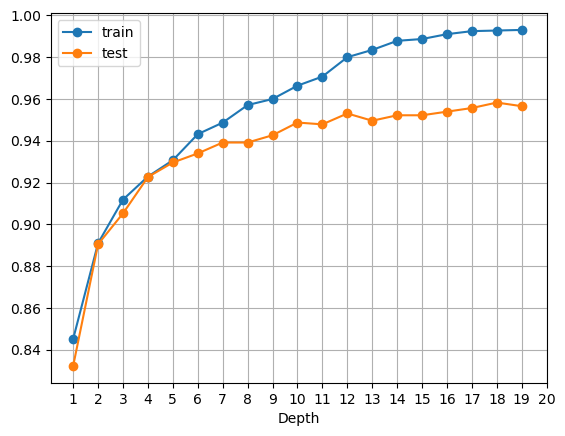

In [173]:
# plot
fig1, ax1=plt.subplots()
scores_df.plot(marker="o",ax=ax1)
ax1.set_xticks(range(1,21))
ax1.set_xlabel("Depth")
plt.grid(True)

plt.show()

In [174]:
#look at random forest with max_depth=11. 11 seems to be where the training levels off amd has a decent accuracy.
rf_model_11=RandomForestClassifier(max_depth=11, random_state=1, n_estimators=200)
rf_model_11=rf_model_11.fit(X_train_scale, y_train)
display(rf_model_11)

#predictions
rf_11_predictions=rf_model_11.predict(X_test_scale)
rf_11_predictions

#scores
print("Standard Accuracy")
print(f"Standard Training Data Score: {rf_model_11.score(X_train_scale, y_train)}")
print(f"Standard Testing Data Score: {rf_model_11.score(X_test_scale, y_test)}")
print("-"*300)
print("Balanced Accuracy")
print(f"Balanced Training Data Score: {balanced_accuracy_score(y_test,rf_11_predictions)}")

#although the scores are little lower, there is less overfitting and generalization will be better.

RandomForestClassifier(max_depth=11, n_estimators=200, random_state=1)

Standard Accuracy
Standard Training Data Score: 0.9733333333333334
Standard Testing Data Score: 0.9496090356211989
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Balanced Accuracy
Balanced Training Data Score: 0.9430161943319838


In [176]:
#since the random forest with depth of 11 did better, going to look at more metrics for random forest with depth of 11 to see if it holds up


#confusion matrix
print("confusion_matrix")
print(confusion_matrix(y_test, rf_11_predictions, labels = [1,0]))
print("-"*300)
#recall 0 means legitimate website
print("classification_report")
print(classification_report(y_test, rf_11_predictions))
print("-"*300)
#roc auc score
print("roc auc score")
rf_11_predictions_prob=rf_model_11.predict_proba(X_test_scale)
rf_11_predictions_prob_first=[prob[1] for prob in rf_11_predictions_prob]
print(roc_auc_score(y_test, rf_11_predictions_prob_first))

confusion_matrix
[[430  45]
 [ 13 663]]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
classification_report
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       676
           1       0.97      0.91      0.94       475

    accuracy                           0.95      1151
   macro avg       0.95      0.94      0.95      1151
weighted avg       0.95      0.95      0.95      1151

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
roc auc s

## Evaluate the Models

Which model performed better? How does that compare to your prediction? Write down your results and thoughts in the following markdown cell.

The random forest model did better than the logistic regression.  The train/test accuracy for the the logistic regression were 0.93/0.92 compared to 0.97/0.95 for the random forest model with a depth of 11. Although the data was not that unbalanced, the balanced accuracy was also good at 0.94.  Using the default depth settings for the random forest did produce better accuracy scores of 1.0/0.96 compared to a depth of 11 but the numbers were too high and suggested overfitting.  In addition, the confusion matrix looked good with just 5% total in the false positive and false negative categories.  All the metrics for both spam and not spam in the classifications report were good as well as the Area Under the Receiver Operating Characteristic Curve.  The random forest model with a depth of 11 performed well on all the metrics and did better than the logistic regression.  This is consistent with the prediction.